In [1]:
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
import os
import cv2

# Loading Model

In [3]:
new_model = load_model(os.path.join("Models", "Tensorflow_Video.keras"))

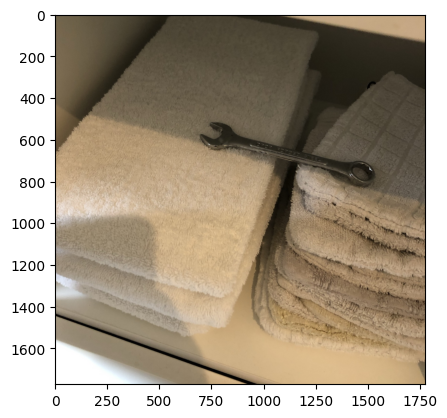

In [63]:
img = cv2.imread("Data/Real/CombWrench/IMG_0630.JPEG")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

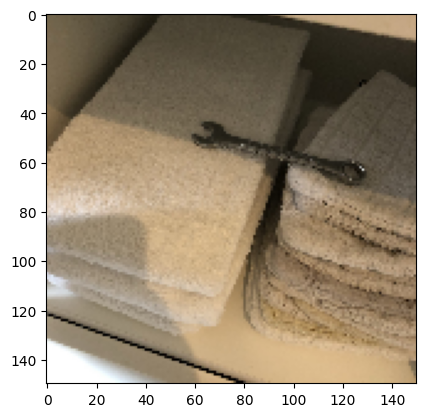

In [64]:
resize = tf.image.resize(img, (150,150))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [65]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [66]:
yhat

array([[0.0771426 , 0.26054358, 0.32358113, 0.33873263]], dtype=float32)

In [67]:
np.argmax(yhat)

3